In [33]:
#Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [35]:
df = pd.read_csv('valencia_trabajo.csv')
df.shape

(9009, 79)

In [4]:

Valencia = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, errors='ignore')


In [6]:
Val_cuant = df.select_dtypes(['int64','float64'])
Val_corr = Val_cuant.corr()
Val_corr

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,1.000000,NaN,0.489583,0.027177,0.034004,-0.057380,0.020642,-0.113125,NaN,-0.160863,...,0.203239,0.123511,0.164316,0.006875,0.129537,0.095673,0.026518,0.076872,NaN,0.022807
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.489583,NaN,1.000000,0.025569,-0.026862,-0.024950,0.016212,-0.111641,NaN,-0.127729,...,0.078820,0.024413,0.031014,-0.025049,0.021896,0.058408,0.013902,0.029473,NaN,0.030646
host_listings_count,0.027177,NaN,0.025569,1.000000,0.882672,-0.008591,0.002440,0.035731,NaN,-0.048907,...,-0.033175,-0.061802,-0.084609,0.010760,-0.102202,0.707545,0.493596,-0.054384,NaN,-0.066365
host_total_listings_count,0.034004,NaN,-0.026862,0.882672,1.000000,-0.001284,0.008297,0.035655,NaN,-0.024455,...,-0.060371,-0.081693,-0.101921,0.000983,-0.119212,0.689491,0.475473,0.012815,NaN,-0.075673
latitude,-0.057380,NaN,-0.024950,-0.008591,-0.001284,1.000000,-0.104097,-0.024117,NaN,0.014282,...,-0.029159,0.004761,-0.005521,0.074100,-0.004029,-0.011417,-0.014843,0.013418,NaN,-0.054767
longitude,0.020642,NaN,0.016212,0.002440,0.008297,-0.104097,1.000000,0.079550,NaN,0.053811,...,-0.024506,-0.002420,0.006992,-0.080095,-0.050266,0.019918,0.021368,-0.060396,NaN,-0.020070
accommodates,-0.113125,NaN,-0.111641,0.035731,0.035655,-0.024117,0.079550,1.000000,NaN,0.573106,...,-0.058999,-0.046319,-0.036530,-0.081125,-0.074746,0.008112,0.236715,-0.393552,NaN,0.008357
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,-0.160863,NaN,-0.127729,-0.048907,-0.024455,0.014282,0.053811,0.573106,NaN,1.000000,...,-0.057350,-0.024463,-0.008602,-0.027710,-0.011465,-0.069616,0.031438,-0.192636,NaN,-0.039582


In [9]:
vars_objetivo = [
    "host_response_rate", 
    "host_acceptance_rate", 
    "host_total_listings_count", 
    "accommodates", 
    "reviews_per_month", 
    "price"   # verifica si en tu df está como "price" o "Price"
]

# Iteramos sobre cada variable objetivo
for var in vars_objetivo:
    if var in Val_corr.columns:
        print(f"\nTop 3 correlaciones para: {var}\n")
        print(
            Val_corr[var]
            .drop(var)  # quitamos la variable consigo misma
            .sort_values(ascending=False, key=lambda x: abs(x)) # ordenamos por valor absoluto
            .head(3)    # top 3
            .to_frame(name="Correlación")  # lo mostramos en tabla
        )




Top 3 correlaciones para: host_total_listings_count

                                             Correlación
host_listings_count                             0.882672
calculated_host_listings_count                  0.689491
calculated_host_listings_count_entire_homes     0.475473

Top 3 correlaciones para: accommodates

          Correlación
beds         0.651327
bedrooms     0.573106
price        0.543207

Top 3 correlaciones para: reviews_per_month

                           Correlación
number_of_reviews_ltm         0.693364
number_of_reviews_l30d        0.612334
estimated_occupancy_l365d     0.587265

Top 3 correlaciones para: price

                                              Correlación
accommodates                                     0.543207
beds                                             0.430596
calculated_host_listings_count_private_rooms    -0.381676


Parámetros ajustados:
a = 0.000012
b = -0.001330
c = 4.905077

Ecuación ajustada:
y = (0.000012)x² + (-0.001330)x + (4.905077)


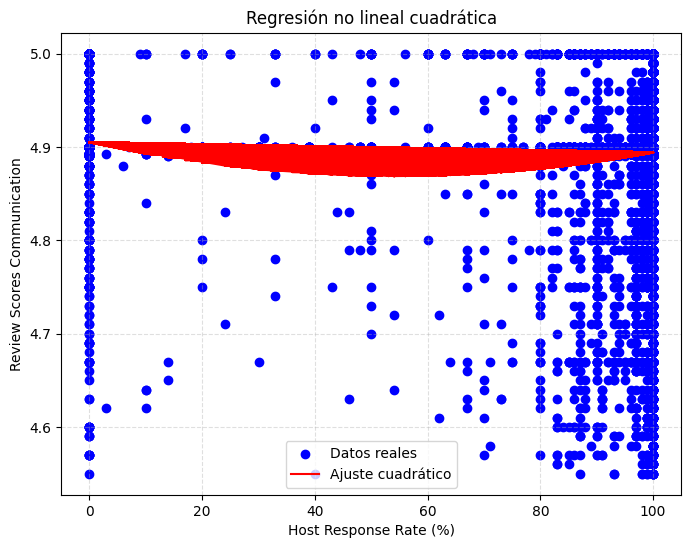

In [13]:
Vars_Indep = df['host_response_rate']
Var_Dep = df['review_scores_communication']

# --- Limpieza y conversión a valores numéricos ---
df['host_response_rate'] = (
    df['host_response_rate']
    .astype(str)
    .str.replace('%', '', regex=False)   # Elimina el símbolo %
    .replace('nan', np.nan)              # Convierte 'nan' en valor nulo real
    .astype(float)                       # Convierte a números
)

df['review_scores_communication'] = pd.to_numeric(df['review_scores_communication'], errors='coerce')

# --- Reasignamos variables limpias ---
x = df['host_response_rate']
y = df['review_scores_communication']

# --- Definición del modelo cuadrático ---
def func1(x, a, b, c):
    return a*x**2 + b*x + c

# --- Ajuste del modelo con curve_fit ---
parametros1, covs = curve_fit(func1, x, y)

# --- Predicciones ---
y_pred1 = func1(x, *parametros1)

# --- Mostrar parámetros del modelo ---
print("Parámetros ajustados:")
print(f"a = {parametros1[0]:.6f}")
print(f"b = {parametros1[1]:.6f}")
print(f"c = {parametros1[2]:.6f}")

# --- Ecuación ajustada ---
print("\nEcuación ajustada:")
print(f"y = ({parametros1[0]:.6f})x² + ({parametros1[1]:.6f})x + ({parametros1[2]:.6f})")

# --- Visualización del ajuste ---
plt.figure(figsize=(8,6))
plt.scatter(x, y, label='Datos reales', color='blue')
plt.plot(x, y_pred1, color='red', label='Ajuste cuadrático')
plt.xlabel('Host Response Rate (%)')
plt.ylabel('Review Scores Communication')
plt.title('Regresión no lineal cuadrática')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

C:\Users\hecto\AppData\Local\Temp\ipykernel_26876\2404724998.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\hecto\AppData\Local\Temp\ipykernel_26876\2404724998.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred1,'bo', label="y-predecida con Función cuadrática", color= "red")


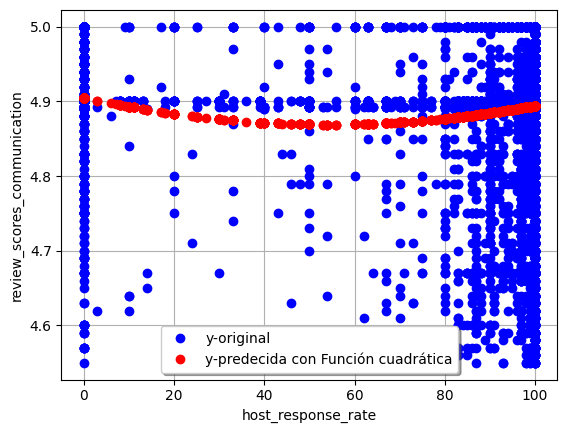

In [14]:
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred1,'bo', label="y-predecida con Función cuadrática", color= "red")
plt.xlabel('host_response_rate')
plt.ylabel('review_scores_communication')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [15]:
R2_Modelo1 = r2_score(y, y_pred1) 
R2_Modelo1 

0.004886885422008658

In [16]:
R = np.sqrt(R2_Modelo1)
R

np.float64(0.06990626167954239)

C:\Users\hecto\AppData\Local\Temp\ipykernel_26876\3594261677.py:11: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros2, covs= curve_fit(func1, df['host_response_rate'], df['estimated_occupancy_l365d'])
C:\Users\hecto\AppData\Local\Temp\ipykernel_26876\3594261677.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\hecto\AppData\Local\Temp\ipykernel_26876\3594261677.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred2,'bo', label="y-predecida con Función tangencial", color= "red")


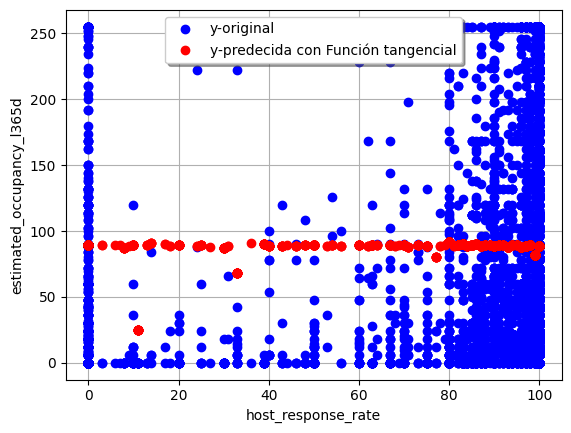

np.float64(0.03124741581566121)

In [17]:
#Función tangencial
Vars_Indep2= df[['host_response_rate']]
Var_Dep2= df['estimated_occupancy_l365d']

x= Vars_Indep2
y= Var_Dep2

def  func1 (x, a, b, c):
    return a*np.tan(x) + b

parametros2, covs= curve_fit(func1, df['host_response_rate'], df['estimated_occupancy_l365d'])

parametros2

y_pred2 = func1(x, *parametros2)

y_pred2

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred2,'bo', label="y-predecida con Función tangencial", color= "red")
plt.xlabel('host_response_rate')
plt.ylabel('estimated_occupancy_l365d')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

R2_Modelo2 = r2_score(y, y_pred2) 
R2_Modelo2 

R = np.sqrt(R2_Modelo2)
R

Parámetros del modelo cuadrático:
a = -0.000480
b = 0.048019
c = 2.916077

Ecuación ajustada:
y = (-0.000480)x² + (0.048019)x + (2.916077)


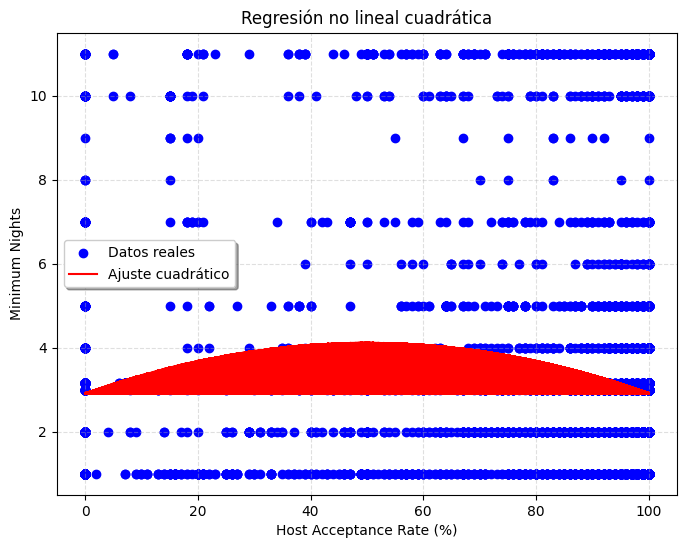


Coeficiente de determinación R² = 0.0161
Coeficiente de correlación R = 0.1268


In [19]:
# --- Limpieza de columnas ---
df['host_acceptance_rate'] = (
    df['host_acceptance_rate']
    .astype(str)
    .str.replace('%', '', regex=False)  # Quita el símbolo de porcentaje
    .replace('nan', np.nan)
    .astype(float)                      # Convierte a números
)

df['minimum_nights'] = pd.to_numeric(df['minimum_nights'], errors='coerce')

# --- Definición de variables ---
x = df['host_acceptance_rate']
y = df['minimum_nights']

# --- Definición del modelo cuadrático ---
def func1(x, a, b, c):
    return a*x**2 + b*x + c

# --- Ajuste del modelo ---
parametros3, covs = curve_fit(func1, x, y)

# --- Parámetros obtenidos ---
print("Parámetros del modelo cuadrático:")
print(f"a = {parametros3[0]:.6f}")
print(f"b = {parametros3[1]:.6f}")
print(f"c = {parametros3[2]:.6f}")
print("\nEcuación ajustada:")
print(f"y = ({parametros3[0]:.6f})x² + ({parametros3[1]:.6f})x + ({parametros3[2]:.6f})")

# --- Predicciones ---
y_pred3 = func1(x, *parametros3)

# --- Visualización ---
plt.figure(figsize=(8,6))
plt.scatter(x, y, color="blue", label="Datos reales")
plt.plot(x, y_pred3, color="red", label="Ajuste cuadrático")
plt.xlabel('Host Acceptance Rate (%)')
plt.ylabel('Minimum Nights')
plt.title('Regresión no lineal cuadrática')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

# --- Cálculo de R² ---
R2_Modelo3 = r2_score(y, y_pred3)
R = np.sqrt(R2_Modelo3)

print(f"\nCoeficiente de determinación R² = {R2_Modelo3:.4f}")
print(f"Coeficiente de correlación R = {R:.4f}")

C:\Users\hecto\AppData\Local\Temp\ipykernel_26876\4238811732.py:10: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros4, covs= curve_fit(func1, df['host_acceptance_rate'], df['minimum_minimum_nights'])
C:\Users\hecto\AppData\Local\Temp\ipykernel_26876\4238811732.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\hecto\AppData\Local\Temp\ipykernel_26876\4238811732.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred4,'bo', label="y-predecida con Función senoidal", color= "red")


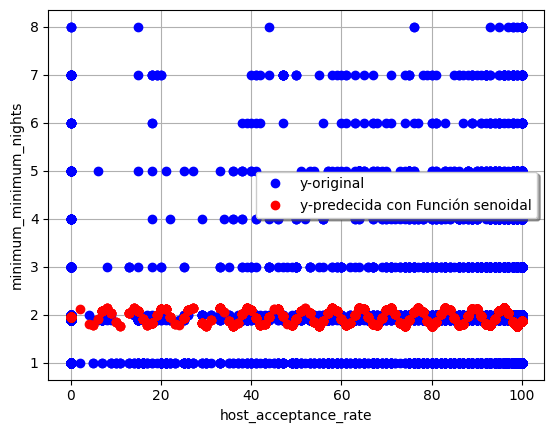

np.float64(0.08978313757852668)

In [20]:
Vars_Indep4= df[['host_acceptance_rate']]
Var_Dep4= df['minimum_minimum_nights']

x= Vars_Indep4
y= Var_Dep4

def  func1 (x, a, b, c):
     return a*np.sin(x) + b

parametros4, covs= curve_fit(func1, df['host_acceptance_rate'], df['minimum_minimum_nights'])

parametros4

y_pred4 = func1(x, *parametros4)

y_pred4

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred4,'bo', label="y-predecida con Función senoidal", color= "red")
plt.xlabel('host_acceptance_rate')
plt.ylabel('minimum_minimum_nights')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

R2_Modelo4 = r2_score(y, y_pred4) 
R2_Modelo4 

R = np.sqrt(R2_Modelo4)
R

#Top 3 correlaciones para: host_acceptance_rate
#                        Correlación
#minimum_nights            -0.060021
#minimum_minimum_nights    -0.057223

C:\Users\hecto\AppData\Local\Temp\ipykernel_26876\973614138.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color="blue")
C:\Users\hecto\AppData\Local\Temp\ipykernel_26876\973614138.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred5, 'bo', label="y-predecida con Función logaritmica", color="red")


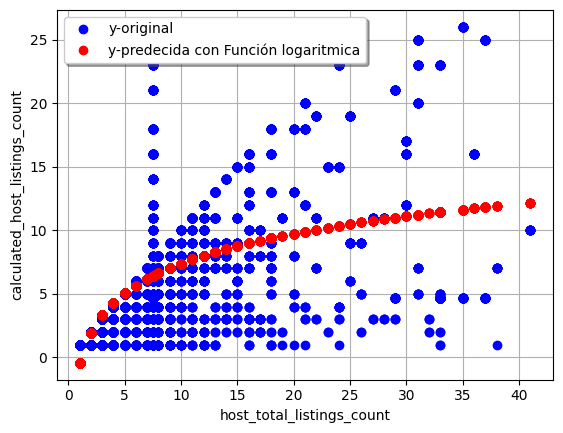

np.float64(0.7024258650176144)

In [21]:
# Filtrar valores positivos para evitar log(0) o log(valores negativos)
mask = df['host_total_listings_count'] > 0
Vars_Indep5 = df.loc[mask, ['host_total_listings_count']]
Var_Dep5 = df.loc[mask, 'calculated_host_listings_count']

x = Vars_Indep5
y = Var_Dep5

def func1(x, a, b):
    return a * np.log(x) + b

# Ajustar el modelo solo con valores válidos
parametros5, covs = curve_fit(func1, Vars_Indep5['host_total_listings_count'], Var_Dep5)

parametros5

y_pred5 = func1(x, *parametros5)

y_pred5

plt.plot(x, y, 'bo', label="y-original", color="blue")
plt.plot(x, y_pred5, 'bo', label="y-predecida con Función logaritmica", color="red")
plt.xlabel('host_total_listings_count')
plt.ylabel('calculated_host_listings_count')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

R2_Modelo5 = r2_score(y, y_pred5)
R2_Modelo5

R = np.sqrt(R2_Modelo5)
R

#                                              Correlación
#calculated_host_listings_count                  0.621283
#calculated_host_listings_count_entire_homes     0.353657

C:\Users\hecto\AppData\Local\Temp\ipykernel_26876\3930644727.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\hecto\AppData\Local\Temp\ipykernel_26876\3930644727.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred6,'bo', label="y-predecida con Función cuadrática", color= "red")


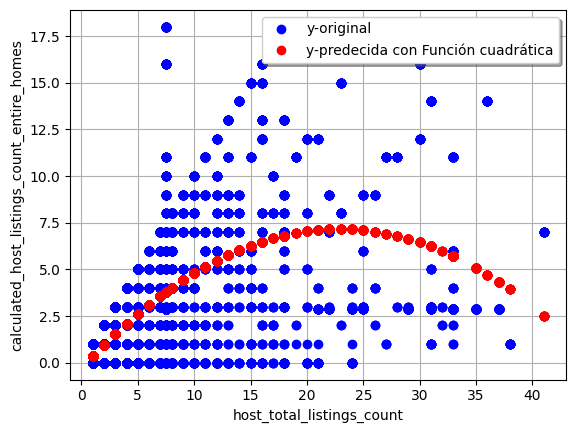

np.float64(0.5826722973448066)

In [22]:
Vars_Indep6= df[['host_total_listings_count']]
Var_Dep6= df['calculated_host_listings_count_entire_homes']

x= Vars_Indep6
y= Var_Dep6

def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

parametros6, covs= curve_fit(func1, df['host_total_listings_count'], df['calculated_host_listings_count_entire_homes'])

parametros6

y_pred6 = func1(x, *parametros6)

y_pred6

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred6,'bo', label="y-predecida con Función cuadrática", color= "red")
plt.xlabel('host_total_listings_count')
plt.ylabel('calculated_host_listings_count_entire_homes')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

R2_Modelo6 = r2_score(y, y_pred6) 
R2_Modelo6

R = np.sqrt(R2_Modelo6)
R

#                                              Correlación
#calculated_host_listings_count                  0.621283
#calculated_host_listings_count_entire_homes     0.353657

C:\Users\hecto\AppData\Local\Temp\ipykernel_26876\1938843970.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\hecto\AppData\Local\Temp\ipykernel_26876\1938843970.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred7,'bo', label="y-predecida con Función cuadrática", color= "red")


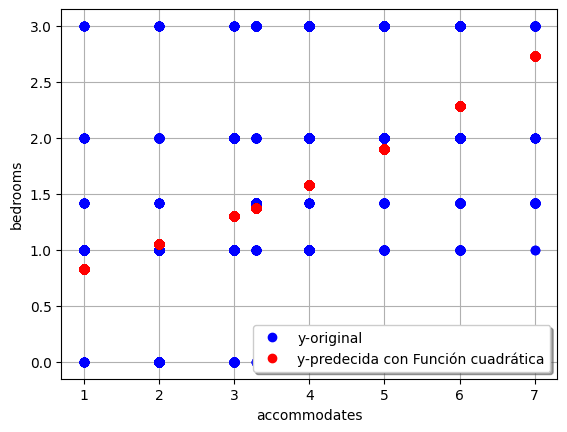

np.float64(0.5786853224124836)

In [23]:
#Función tangencial
Vars_Indep7= df[['accommodates']]
Var_Dep7= df['bedrooms']

x= Vars_Indep7
y= Var_Dep7

def  func1 (x, a, b, c):
     return a**x**2 + b*x + c

parametros7, covs= curve_fit(func1, df['accommodates'], df['bedrooms'], maxfev=10000)

parametros7

y_pred7 = func1(x, *parametros7)

y_pred7

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred7,'bo', label="y-predecida con Función cuadrática", color= "red")
plt.xlabel('accommodates')
plt.ylabel('bedrooms')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

R2_Modelo7 = r2_score(y, y_pred7) 
R2_Modelo7

R = np.sqrt(R2_Modelo7)
R

#bedrooms      0.649348
#beds          0.551342

In [24]:
#Función cociente entre polinomios
Vars_Indep8= df[['accommodates']]
Var_Dep8= df['beds']

x= Vars_Indep8
y= Var_Dep8

def  func1 (x, a, b, c):
     return a*np.exp(-b*x) + c

parametros8, covs= curve_fit(func1, df['accommodates'], df['beds'])

parametros8

y_pred8 = func1(x, *parametros8)

y_pred8

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred8,'bo', label="y-predecida con Función exponencial", color= "red")
plt.xlabel('accommodates')
plt.ylabel('beds')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

R2_Modelo8 = r2_score(y, y_pred8) 
R2_Modelo8

R = np.sqrt(R2_Modelo8)
R

#bedrooms      0.649348
#beds          0.551342

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.


Parámetros del modelo exponencial:
a = 0.000000
b = 17.853652
c = 2.058751


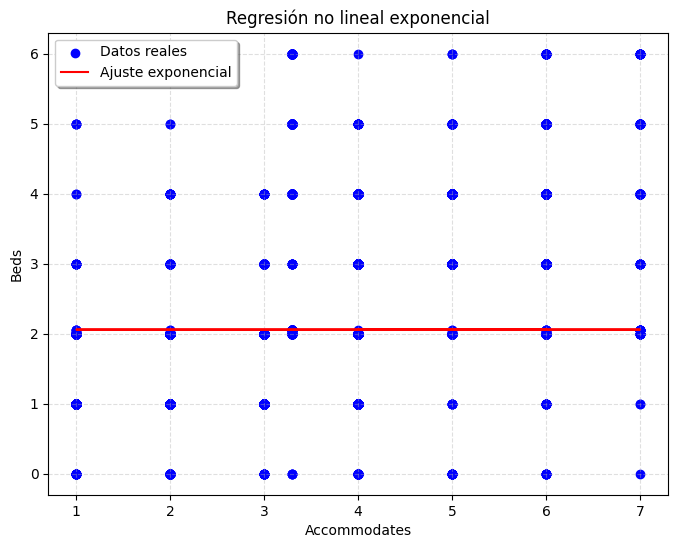


Coeficiente de determinación R² = -0.0000
Coeficiente de correlación R = nan


C:\Users\hecto\AppData\Local\Temp\ipykernel_26876\1188869564.py:49: RuntimeWarning: invalid value encountered in sqrt
  R = np.sqrt(R2_Modelo8)


In [25]:
# --- Limpieza de datos ---
df['accommodates'] = pd.to_numeric(df['accommodates'], errors='coerce')
df['beds'] = pd.to_numeric(df['beds'], errors='coerce')

# Eliminar filas con valores faltantes
df_clean = df.dropna(subset=['accommodates', 'beds'])

x = df_clean['accommodates'].values
y = df_clean['beds'].values

# --- Definición del modelo exponencial ---
def func1(x, a, b, c):
    return a * np.exp(-b * x) + c

# --- Ajuste del modelo con parámetros iniciales y más iteraciones ---
try:
    parametros8, covs = curve_fit(
        func1, x, y,
        p0=[3, 0.5, 1],        # valores iniciales estimados (ajústalos si falla)
        maxfev=10000,          # aumenta número de iteraciones
        bounds=(0, np.inf)     # restringe a valores positivos
    )
except RuntimeError as e:
    print("⚠️ Error en la optimización:", e)
    parametros8 = [np.nan, np.nan, np.nan]

# --- Mostrar parámetros del modelo ---
print("\nParámetros del modelo exponencial:")
print(f"a = {parametros8[0]:.6f}")
print(f"b = {parametros8[1]:.6f}")
print(f"c = {parametros8[2]:.6f}")

# --- Predicciones ---
y_pred8 = func1(x, *parametros8)

# --- Visualización ---
plt.figure(figsize=(8,6))
plt.scatter(x, y, color="blue", label="Datos reales")
plt.plot(x, y_pred8, color="red", label="Ajuste exponencial")
plt.xlabel('Accommodates')
plt.ylabel('Beds')
plt.title('Regresión no lineal exponencial')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

# --- Cálculo de R² ---
R2_Modelo8 = r2_score(y, y_pred8)
R = np.sqrt(R2_Modelo8)

print(f"\nCoeficiente de determinación R² = {R2_Modelo8:.4f}")
print(f"Coeficiente de correlación R = {R:.4f}")

C:\Users\hecto\AppData\Local\Temp\ipykernel_26876\2955403116.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\hecto\AppData\Local\Temp\ipykernel_26876\2955403116.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred9,'bo', label="y-predecida con Función cuadrática", color= "red")


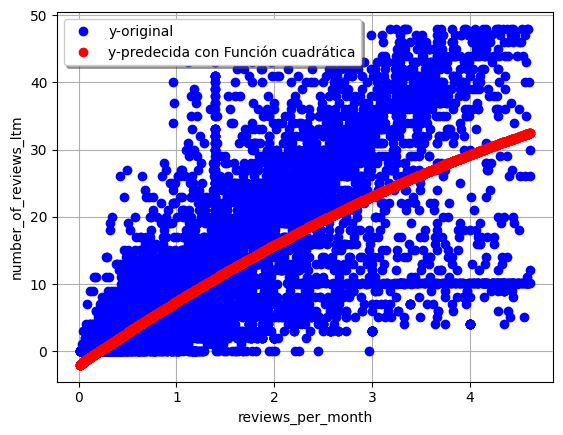

np.float64(0.6959648715920659)

In [26]:
#Función
Vars_Indep9= df[['reviews_per_month']]
Var_Dep9= df['number_of_reviews_ltm']

x= Vars_Indep9
y= Var_Dep9

def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

parametros9, covs= curve_fit(func1, df['reviews_per_month'], df['number_of_reviews_ltm'], maxfev=10000)

parametros9

y_pred9 = func1(x, *parametros9)

y_pred9

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred9,'bo', label="y-predecida con Función cuadrática", color= "red")
plt.xlabel('reviews_per_month')
plt.ylabel('number_of_reviews_ltm')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

R2_Modelo9 = r2_score(y, y_pred9) 
R2_Modelo9

R = np.sqrt(R2_Modelo9)
R

#number_of_reviews_ltm         0.775723
#estimated_occupancy_l365d     0.751280

C:\Users\hecto\AppData\Local\Temp\ipykernel_26876\534921607.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\hecto\AppData\Local\Temp\ipykernel_26876\534921607.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred10,'bo', label="y-predecida con Función polinomial inversa", color= "red")


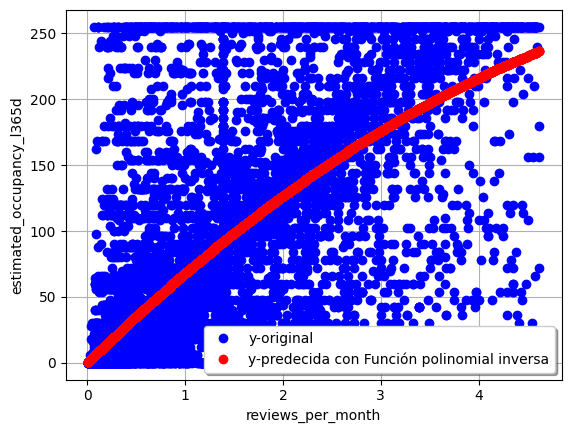

np.float64(0.5857983519370781)

In [27]:
#Función polinomial inversa
Vars_Indep10= df[['reviews_per_month']]
Var_Dep10= df['estimated_occupancy_l365d']

x= Vars_Indep10
y= Var_Dep10

def  func1 (x, a, b, c):
     return a/b*x**2 + c*x

parametros10, covs= curve_fit(func1, df['reviews_per_month'], df['estimated_occupancy_l365d'], maxfev=10000)

parametros10

y_pred10 = func1(x, *parametros10)

y_pred10

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred10,'bo', label="y-predecida con Función polinomial inversa", color= "red")
plt.xlabel('reviews_per_month')
plt.ylabel('estimated_occupancy_l365d')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

R2_Modelo10 = r2_score(y, y_pred10) 
R2_Modelo10

R = np.sqrt(R2_Modelo10)
R

#number_of_reviews_ltm         0.775723
#estimated_occupancy_l365d     0.751280

C:\Users\hecto\AppData\Local\Temp\ipykernel_26876\3085805020.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\hecto\AppData\Local\Temp\ipykernel_26876\3085805020.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred11,'bo', label="y-predecida con Función cuadrática", color= "red")


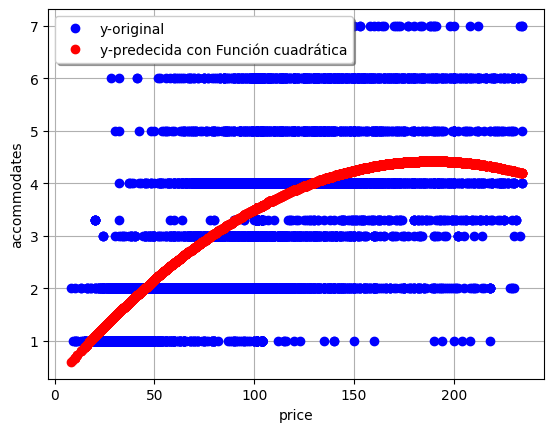

np.float64(0.5838810730256774)

In [28]:
#Función 
Vars_Indep11= df[['price']]
Var_Dep11= df['accommodates']

x= Vars_Indep11
y= Var_Dep11

def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

parametros11, covs= curve_fit(func1, df['price'], df['accommodates'], maxfev=10000)

parametros11

y_pred11 = func1(x, *parametros11)

y_pred11

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred11,'bo', label="y-predecida con Función cuadrática", color= "red")
plt.xlabel('price')
plt.ylabel('accommodates')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

R2_Modelo11 = r2_score(y, y_pred11) 
R2_Modelo11

R = np.sqrt(R2_Modelo11)
R

#accommodates     0.361541
#bedrooms         0.354766

C:\Users\hecto\AppData\Local\Temp\ipykernel_26876\499483796.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\hecto\AppData\Local\Temp\ipykernel_26876\499483796.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred12,'bo', label="y-predecida con Función cuadrática", color= "red")


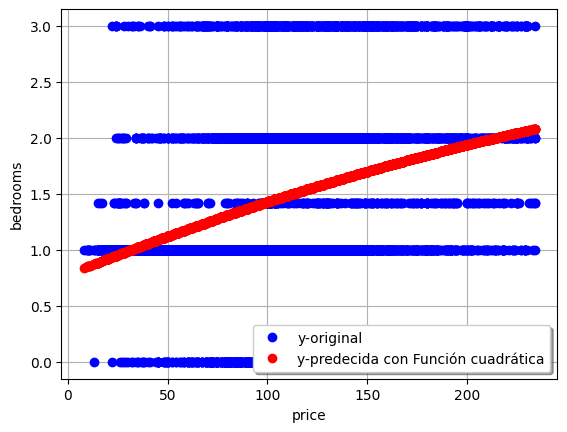

np.float64(0.3300842507991925)

In [29]:
#Función logaritmica
Vars_Indep12= df[['price']]
Var_Dep12= df['bedrooms']

x= Vars_Indep12
y= Var_Dep12

def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

parametros12, covs= curve_fit(func1, df['price'], df['bedrooms'], maxfev=10000)

parametros12

y_pred12 = func1(x, *parametros12)

y_pred12

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred12,'bo', label="y-predecida con Función cuadrática", color= "red")
plt.xlabel('price')
plt.ylabel('bedrooms')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

R2_Modelo12 = r2_score(y, y_pred12) 
R2_Modelo12

R = np.sqrt(R2_Modelo12)
R

#accommodates     0.361541
#bedrooms         0.354766

In [31]:
import re, numpy as np, pandas as pd

# --- limpieza ligera de nombres (evitar espacios finales) ---
df.columns = df.columns.str.strip()
try:
    Mex_corr.columns = Mex_corr.columns.str.strip()
    Mex_corr.index   = Mex_corr.index.str.strip()
except Exception:
    pass

# ========= 1) Recolectar R² de R2_Modelo1..12 =========
r2_items = []
for name, val in list(globals().items()):  # 👈 se hace copia de globals()
    m = re.match(r"^R2_Modelo(\d+)$", name)
    if m and isinstance(val, (float, int, np.floating, np.integer)):
        r2_items.append((int(m.group(1)), float(val)))

# asegurar que estén del 1 al 12
for i in range(1, 13):
    v = globals().get(f"R2_Modelo{i}")
    if v is not None and (i, float(v)) not in r2_items:
        r2_items.append((i, float(v)))

df_r2 = (pd.DataFrame(r2_items, columns=["Modelo", "R2"])
         .drop_duplicates(subset=["Modelo"])
         .sort_values("Modelo")
         .reset_index(drop=True))
df_r2["R"] = np.where(df_r2["R2"] >= 0, np.sqrt(df_r2["R2"]), np.nan)

# ========= 2) Mapeo de relaciones =========
model_to_pair = {
    1: ("host_response_rate", "review_scores_communication"),
    2: ("host_response_rate", "estimated_occupancy_l365d"),
    3: ("host_acceptance_rate", "minimum_nights"),
    4: ("host_acceptance_rate", "minimum_minimum_nights"),
    5: ("host_total_listings_count", "calculated_host_listings_count"),
    6: ("host_total_listings_count", "calculated_host_listings_count_entire_homes"),
    7: ("accommodates", "bedrooms"),
    8: ("accommodates", "beds"),
    9: ("reviews_per_month", "number_of_reviews_ltm"),
    10: ("reviews_per_month", "estimated_occupancy_l365d"),
    11: ("price", "accommodates"),
    12: ("price", "bedrooms")
}

# ========= 3) Correlación lineal =========
def corr_lineal(xcol, ycol):
    try:
        if xcol in Mex_corr.columns and ycol in Mex_corr.columns:
            return float(Mex_corr.loc[xcol, ycol])
    except Exception:
        pass
    if xcol in df.columns and ycol in df.columns:
        s = df[[xcol, ycol]].apply(pd.to_numeric, errors='coerce')
        s = s.replace([np.inf, -np.inf], np.nan).dropna()
        if len(s) >= 2:
            return float(s.corr(method="pearson").iloc[0, 1])
    return np.nan

# Añadir columnas 'X', 'Y', 'Relación', 'Corr_lineal', 'Aceptado'
df_r2[["X", "Y"]] = df_r2["Modelo"].map(model_to_pair).apply(pd.Series)
df_r2["Relación"] = df_r2.apply(lambda r: f"{r['X']} vs {r['Y']}", axis=1)
df_r2["Corr_lineal"] = df_r2.apply(lambda r: corr_lineal(r["X"], r["Y"]), axis=1)

df_r2["Aceptado"] = df_r2.apply(
    lambda r: "Sí" if pd.notnull(r["R"]) and pd.notnull(r["Corr_lineal"]) and r["R"] > abs(r["Corr_lineal"]) else "No",
    axis=1
)

# Redondear para mejor lectura
df_r2[["R2", "R", "Corr_lineal"]] = df_r2[["R2", "R", "Corr_lineal"]].round(3)

# Orden final
df_r2 = df_r2[["Modelo", "Relación", "Corr_lineal", "R", "R2", "Aceptado"]]

print(df_r2)


    Modelo                                           Relación  Corr_lineal  \
0        1  host_response_rate vs review_scores_communication       -0.019   
1        2    host_response_rate vs estimated_occupancy_l365d        0.278   
2        3             host_acceptance_rate vs minimum_nights       -0.042   
3        4     host_acceptance_rate vs minimum_minimum_nights       -0.081   
4        5  host_total_listings_count vs calculated_host_l...        0.689   
5        6  host_total_listings_count vs calculated_host_l...        0.475   
6        7                           accommodates vs bedrooms        0.573   
7        8                               accommodates vs beds        0.651   
8        9         reviews_per_month vs number_of_reviews_ltm        0.693   
9       10     reviews_per_month vs estimated_occupancy_l365d        0.587   
10      11                              price vs accommodates        0.543   
11      12                                  price vs bedrooms   

c:\Users\hecto\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
